<a href="https://colab.research.google.com/github/phps-28/Data-Science-PGEBM/blob/master/Treinamento_TensorFlow%20/TF_prj_9_Redes_Convolucionais_Classifica%C3%A7%C3%A3o_Objetos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Importando as Libs**

In [62]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow.keras import layers
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import os
import PIL
import pickle
import zipfile

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


## **Carregando a Base de Dados**

In [63]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [64]:
X_train.shape

(50000, 32, 32, 3)

In [65]:
X_test.shape

(10000, 32, 32, 3)

In [66]:
y_train.shape

(50000, 1)

In [67]:
y_test.shape

(10000, 1)

## **Visualizando os Dados**

[2]


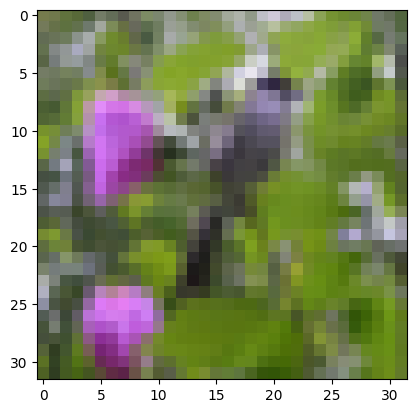

In [68]:
i = 300
plt.imshow(X_train[i])
print(y_train[i])

/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


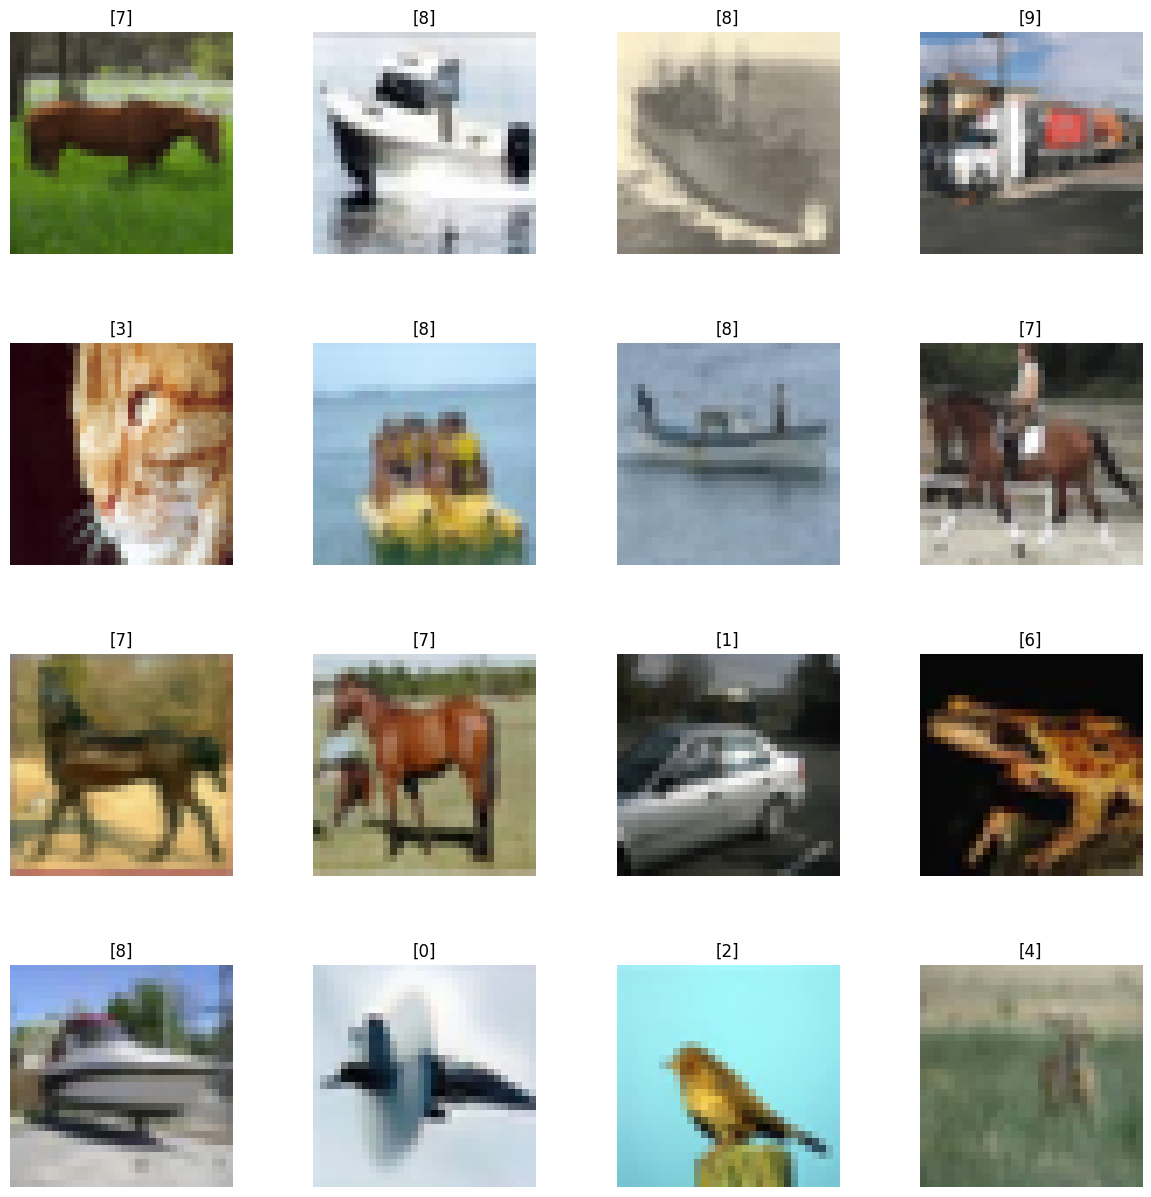

In [69]:
W_grid = 4
L_grid = 4
fig, axes = plt.subplots(L_grid, W_grid, figsize = (15, 15))
axes = axes.ravel()
n_training = len(X_train)

for j in np.arange(0, W_grid * L_grid):
    index = np.random.randint(0, n_training)
    axes[j].imshow(X_train[index])
    axes[j].set_title(y_train[index])
    axes[j].axis('off')

plt.subplots_adjust(hspace = 0.4)

## **Preparação e Processamento da Base de Dados**

In [70]:
X_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [71]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [72]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

O 'y' indica a classe da imagem, e tais classes estão indexadas entre 1 e 10. Desde modo, os valores não podem ser organizados por ordem de importancia, onde, por exemplo, o 2 não pode ser maior que o 1, 5 maior que 3 e assim por diante.
<br>
<br>
Assim, será usado o One Hot Encoder para codificar cada uma das 10 categorias da classe.

In [73]:
number_cat = 10

In [74]:
# Usando o One HOt Encoder para a var 'y_train' na lib do tf.keras
y_train = tf.keras.utils.to_categorical(y_train, number_cat)

In [75]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [76]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [77]:
# Usando o One HOt Encoder para a var 'y_test' na lib do tf.keras
y_test = tf.keras.utils.to_categorical(y_test, number_cat)

In [78]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [79]:
# Normalizando os pixels das bases de treino e teste
# Como são 3 canais de cores (RGB), o valor máximo de pixel é 255.
# Agora os pixels estarão normalizados entre 0 e 1
X_train = X_train / 255
X_test = X_test / 255

In [80]:
X_test

array([[[[0.61960787, 0.4392157 , 0.19215687],
         [0.62352943, 0.43529412, 0.18431373],
         [0.64705884, 0.45490196, 0.2       ],
         ...,
         [0.5372549 , 0.37254903, 0.14117648],
         [0.49411765, 0.35686275, 0.14117648],
         [0.45490196, 0.33333334, 0.12941177]],

        [[0.59607846, 0.4392157 , 0.2       ],
         [0.5921569 , 0.43137255, 0.15686275],
         [0.62352943, 0.44705883, 0.1764706 ],
         ...,
         [0.53333336, 0.37254903, 0.12156863],
         [0.49019608, 0.35686275, 0.1254902 ],
         [0.46666667, 0.34509805, 0.13333334]],

        [[0.5921569 , 0.43137255, 0.18431373],
         [0.5921569 , 0.42745098, 0.12941177],
         [0.61960787, 0.43529412, 0.14117648],
         ...,
         [0.54509807, 0.38431373, 0.13333334],
         [0.50980395, 0.37254903, 0.13333334],
         [0.47058824, 0.34901962, 0.12941177]],

        ...,

        [[0.26666668, 0.4862745 , 0.69411767],
         [0.16470589, 0.39215687, 0.5803922 ]

Criando a var de input para o modelo

In [81]:
X_train.shape

(50000, 32, 32, 3)

In [82]:
input_shape = X_train.shape[1:] # [1:] - pegando do 2º parâmetro em diante do método 'shape'

In [83]:
input_shape

(32, 32, 3)

## **Contrução e Treinamento do Modelo**

In [84]:
cnn = tf.keras.Sequential()

# Camada de Convolução
cnn.add(tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = input_shape))
cnn.add(tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'))
cnn.add(tf.keras.layers.MaxPooling2D(2, 2))
cnn.add(tf.keras.layers.Dropout(0.3)) # - fazendo a retirada de 30% da base para evitar o overfitting do modelo

# Camada de Convolução
cnn.add(tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu', input_shape = input_shape))
cnn.add(tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'))
cnn.add(tf.keras.layers.MaxPooling2D(2, 2))
cnn.add(tf.keras.layers.Dropout(0.3)) # - fazendo a retirada de 30% da base para evitar o overfitting do modelo

cnn.add(tf.keras.layers.Flatten()) # transformando a imagem convolucionada em um vetor para a entrada na rede densa

# Camada Densa
cnn.add(tf.keras.layers.Dense(1024, activation = 'relu'))
cnn.add(tf.keras.layers.Dropout(0.3)) # - fazendo a retirada de 30% da base para evitar o overfitting do modelo

# Camada Densa
cnn.add(tf.keras.layers.Dense(1024, activation = 'relu'))

# Camada de Saída
cnn.add(tf.keras.layers.Dense(10, activation = 'softmax'))

cnn.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 10, 10, 64)        36928     
                                                      

In [85]:
cnn.compile(optimizer = tf.keras.optimizers.RMSprop(0.0001, weight_decay = 1e-6), # weight_decay = 0.0000006 -> o tamanho do passo na queda do gradiente vai diminuindo conforme o gradiente vai se aproximando do alvo (erro=0)
            loss ='categorical_crossentropy', metrics =['accuracy'])

# O "loss ='categorical_crossentropy'" é usado qdo o 'X_train' e 'X_test' estão em -One Hot Encoder-
# O "loss ='sparse_categorical_crossentropy'" é usado qdo o 'X_train' e 'X_test' estão em valores esparsos [0,1,4,7,12,...]

In [86]:
epochs = 120
history = cnn.fit(X_train, y_train, batch_size = 512, epochs = epochs)

Epoch 1/120
98/98 [==============================] - 5s 33ms/step - loss: 2.1937 - accuracy: 0.1652
Epoch 2/120
98/98 [==============================] - 3s 32ms/step - loss: 1.9459 - accuracy: 0.2847
Epoch 3/120
98/98 [==============================] - 3s 32ms/step - loss: 1.8223 - accuracy: 0.3373
Epoch 4/120
98/98 [==============================] - 3s 32ms/step - loss: 1.7480 - accuracy: 0.3644
Epoch 5/120
98/98 [==============================] - 3s 32ms/step - loss: 1.6965 - accuracy: 0.3829
Epoch 6/120
98/98 [==============================] - 3s 32ms/step - loss: 1.6523 - accuracy: 0.3991
Epoch 7/120
98/98 [==============================] - 3s 32ms/step - loss: 1.6107 - accuracy: 0.4130
Epoch 8/120
98/98 [==============================] - 3s 32ms/step - loss: 1.5723 - accuracy: 0.4271
Epoch 9/120
98/98 [==============================] - 3s 32ms/step - loss: 1.5395 - accuracy: 0.4404
Epoch 10/120
98/98 [==============================] - 3s 33ms/step - loss: 1.5022 - accuracy: 0.4536

## **Avaliação do Modelo**

In [87]:
evaluation = cnn.evaluate(X_test, y_test)
print('Acurácia do Teste: {}'.format(evaluation[1]))

313/313 [==============================] - 1s 3ms/step - loss: 0.6639 - accuracy: 0.7744
Acurácia do Teste: 0.774399995803833


In [88]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

In [89]:
epochs = range(len(accuracy))
accuracy = history.history['accuracy']
loss = history.history['loss']

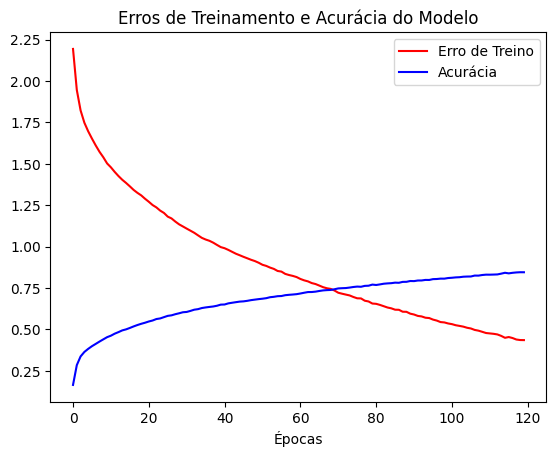

In [90]:
plt.plot(epochs, loss, 'r', label = 'Erro de Treino')
plt.plot(epochs, accuracy, 'b', label = 'Acurácia')
plt.title('Erros de Treinamento e Acurácia do Modelo')
plt.xlabel('Épocas')
plt.legend();

In [91]:
predict_x = cnn.predict(X_test)
predicted_classes = np.argmax(predict_x, axis=1)

313/313 [==============================] - 1s 2ms/step


In [92]:
predicted_classes

array([3, 8, 1, ..., 5, 1, 7])

In [93]:
y_test[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

y_test[1] está apresentado no modo de One Hot Encoder.
<br>
É preciso ver o índice a qual essa codificação se refere na numeração da classe.
<br>
<br>
0 = 0. 0. 0. 0. 0. 0. 0. 0. 0. 0
<br>
1 = 1. 0. 0. 0. 0. 0. 0. 0. 0. 0
<br>
2 = 0. 1. 0. 0. 0. 0. 0. 0. 0. 0
<br>
3 = 0. 0. 1. 0. 0. 0. 0. 0. 0. 0
<br>
4 = 0. 0. 0. 1. 0. 0. 0. 0. 0. 0
<br>
5 = 0. 0. 0. 0. 1. 0. 0. 0. 0. 0
<br>
6 = 0. 0. 0. 0. 0. 1. 0. 0. 0. 0
<br>
7 = 0. 0. 0. 0. 0. 0. 1. 0. 0. 0
<br>
.
<br>
.
<br>
.

In [94]:
y_test = y_test.argmax(1)

In [95]:
y_test

array([3, 8, 8, ..., 5, 1, 7])

Visualizando a classe predita e a classe real

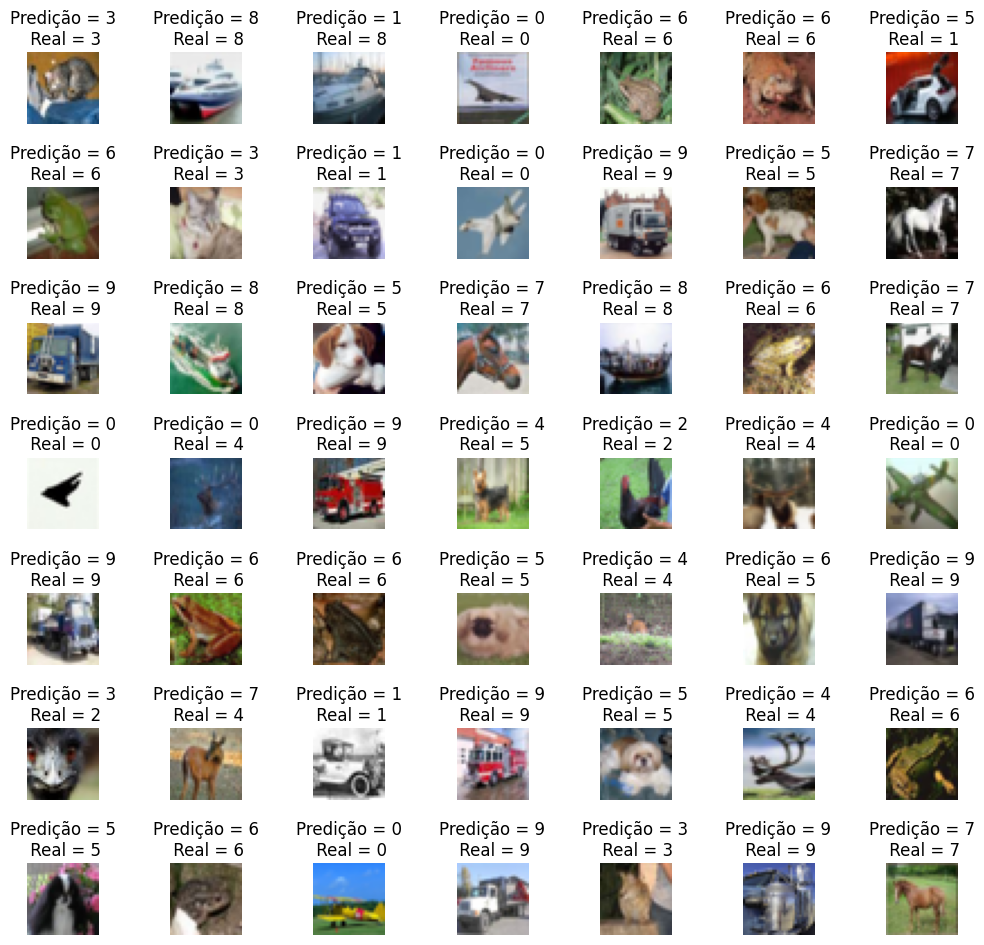

In [96]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Predição = {}\n Real = {}'.format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)

Montando a Matriz de Confusão que cruza os valores Reais com os Preditos pelo modelo, onde:
<br>
<br>
x = Predito
<br>
y = Real

<Axes: >

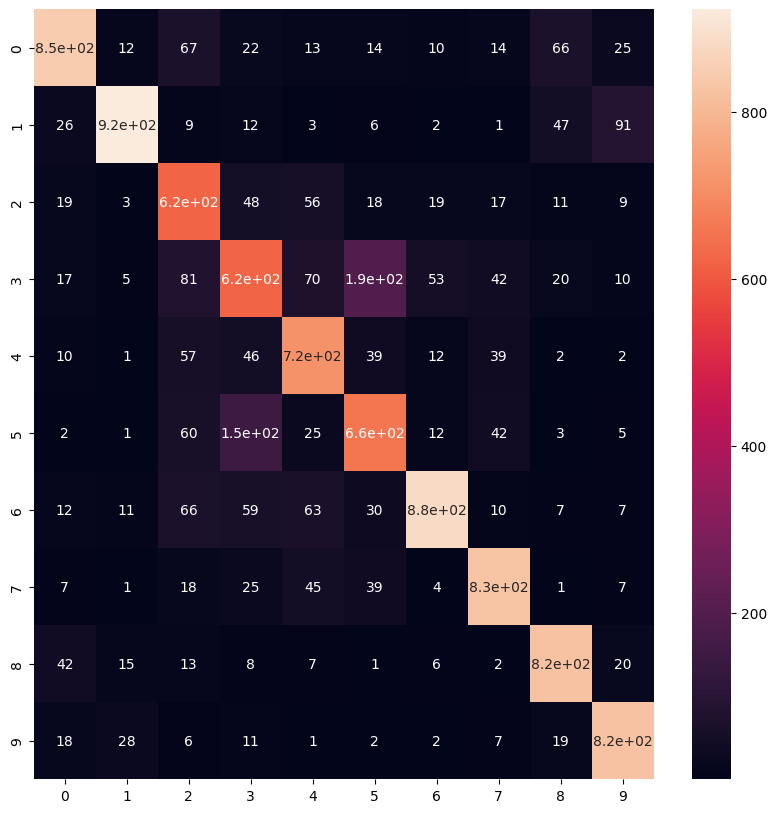

In [97]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(predicted_classes, y_test)
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True)

In [98]:
cm

array([[847,  12,  67,  22,  13,  14,  10,  14,  66,  25],
       [ 26, 923,   9,  12,   3,   6,   2,   1,  47,  91],
       [ 19,   3, 623,  48,  56,  18,  19,  17,  11,   9],
       [ 17,   5,  81, 621,  70, 192,  53,  42,  20,  10],
       [ 10,   1,  57,  46, 717,  39,  12,  39,   2,   2],
       [  2,   1,  60, 148,  25, 659,  12,  42,   3,   5],
       [ 12,  11,  66,  59,  63,  30, 880,  10,   7,   7],
       [  7,   1,  18,  25,  45,  39,   4, 826,   1,   7],
       [ 42,  15,  13,   8,   7,   1,   6,   2, 824,  20],
       [ 18,  28,   6,  11,   1,   2,   2,   7,  19, 824]])